In [68]:
import pandas as pd #analisis de datos
import numpy as np #operaciones matematicas con vectores y matrices
from sklearn import linear_model #facilita modelos matematicos de algoritmos de regresion
from sklearn import model_selection#facilita la division del dataset en subsets
from sklearn.metrics import classification_report#construye un reporte con las principales metricas
from sklearn.metrics import confusion_matrix#calcula la matriz de confusion
from sklearn.metrics import accuracy_score #calcula la puntuacion de la exactitud de las predicciones
import matplotlib.pyplot as plt#genera graficas
import seaborn as sb#basada en  matplotlib, genera graficas visualmente más atractivas
from sklearn.decomposition import PCA #extencion de sklearn para principal component analysis
from sklearn.preprocessing import StandardScaler #extencion de sklearn para estandarizar
%matplotlib inline

In [ ]:
dataframe = pd.read_csv("./usuarios_win_mac_lin.csv")
dataframe.head()

In [70]:
dataframe.describe()#datos estadisticos que describen al dataframe

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [71]:
print(dataframe.groupby('clase').size()) #se generan los grupos por el sistema operativo que utilizan

clase
0    86
1    40
2    44
dtype: int64


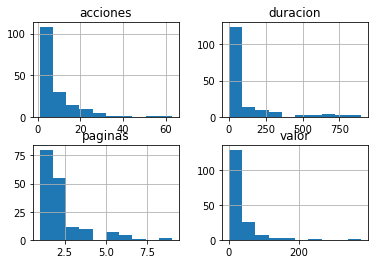

In [72]:
dataframe.drop(['clase'],1).hist() # Se remueve la columna clase
plt.show()

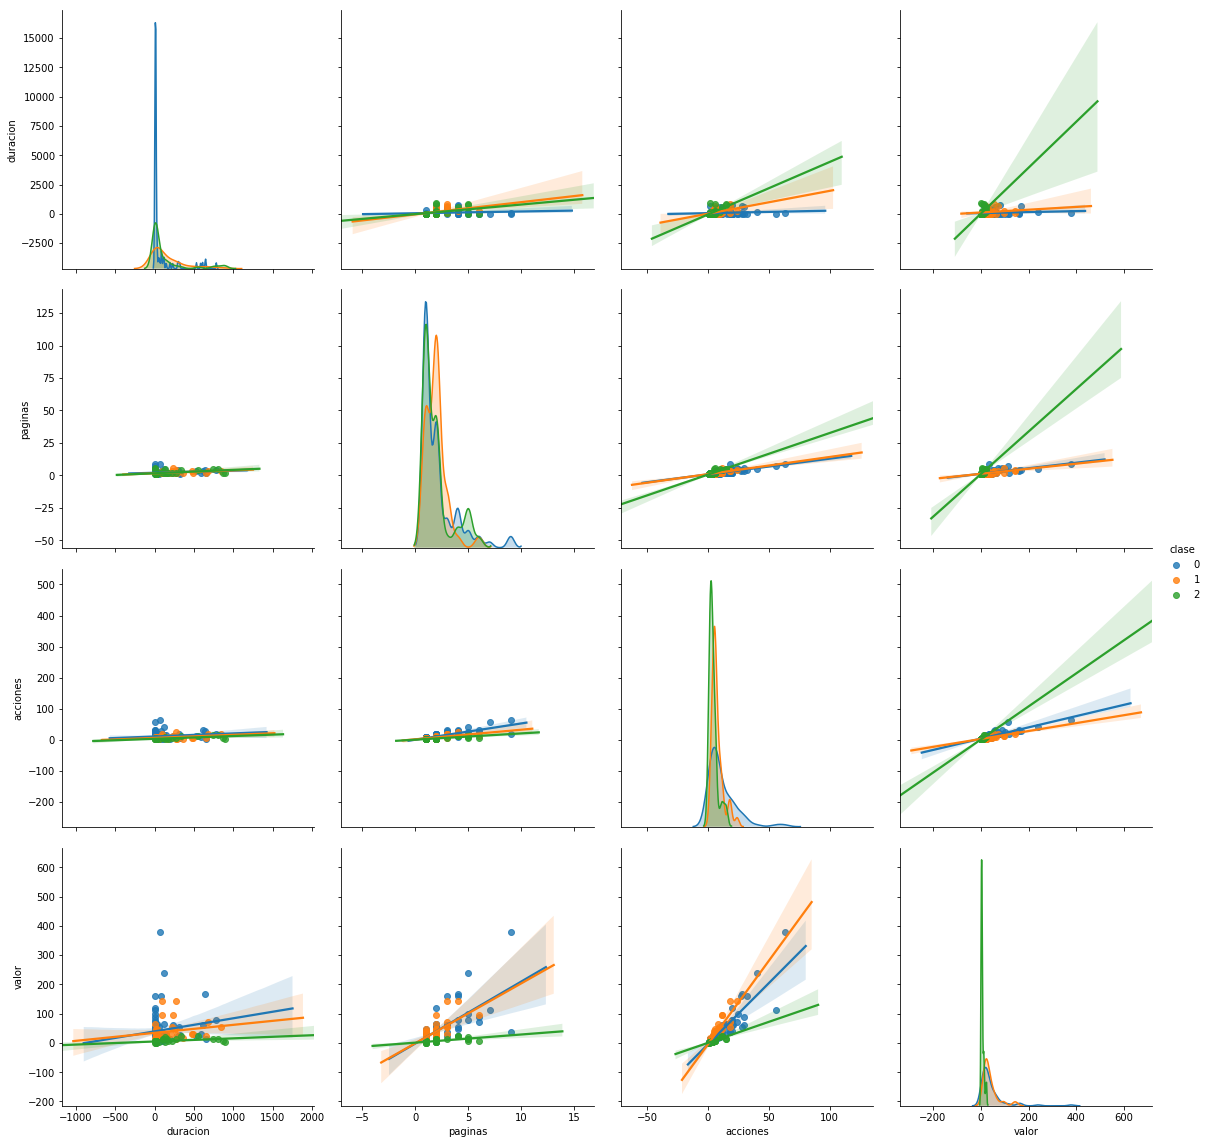

In [73]:
sb.pairplot(dataframe.dropna(), hue='clase',height=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')
#interrelacionar en pares las variables

In [74]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
print("head of array X",X[:10])
print("head of array y",y[:10])

head of array X [[  7.   2.   4.   8.]
 [ 21.   2.   6.   6.]
 [ 57.   2.   4.   4.]
 [101.   3.   6.  12.]
 [109.   2.   6.  12.]
 [125.   5.  10.  20.]
 [133.   2.   2.   4.]
 [162.   2.   6.  12.]
 [170.   2.   4.   8.]
 [217.   2.   6.   6.]]
head of array y [2 2 2 2 2 2 2 2 2 2]


In [78]:
scaler=StandardScaler()#normalizamos los datos

scaler.fit(X) # calculo la media y estandar para escalar posteriormente
X_scaled=scaler.transform(X)# Se realiza la estandarizacion, centrando y escalando

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) # se instancia el PCA, con el numero de variables que tiene el dataset
pca.fit(X_scaled) # entrena el modelo con los valores escalados 
X_pca=pca.transform(X_scaled) # y aplica la reduccion de dimensiones

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_ #regresa un vector de la varianza explicada en cada dimension
print(expl) #se imprime lo anterior
print('suma:',expl[0:2].sum())#Vemos que con 2 componentes tenemos algo mas del 85% de varianza explicada


shape of X_pca (170, 4)
[0.62845714 0.24417166 0.09927536 0.02809584]
suma: 0.8726288030569754


In [59]:
model = linear_model.LogisticRegression(solver='lbfgs')
model.fit(X,y)
modelconPCA=linear_model.LogisticRegression(solver='lbfgs')
modelconPCA.fit(X_scaled[:,0:3],y)

/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
predictions = model.predict(X)
print("predicciones sin PCA",predictions[0:15])

predictionscConPCA=modelconPCA.predict(X_scaled[:,0:3])
print("predicciones con PCA",predictionsConPCA[0:15])

predicciones sin PCA [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
predicciones con PCA [0 0 2 2 0 2 2 0 2 0 2 0 1 1 2]


In [66]:
print(model.score(X,y))
print(modelconPCA.score(X_scaled[:,0:3],y))

0.7705882352941177
0.5235294117647059


In [67]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [16]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.743407 (0.115752)


/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

In [17]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [18]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [19]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

   micro avg       0.85      0.85      0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [20]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])